# **Previsão básica de ações utilizando Multi Layer Perceptron**

- Diogo Nunes Batista

### Carregamento dos dados

In [31]:
import pandas
import numpy as np

df_stocks_types = {
    'ABERTURA': np.float64,
    'FECHAMENTO': np.float64,
    'VARIAÇÃO': np.float64,
    'MÍNIMO': np.float64,
    'MÁXIMO': np.float64,
    'VOLUME': str
}

df_selic_types = {
    'valor': np.float64,
}

df_stocks = pandas.read_csv('IRB_Brasil_RE_IRBR3.csv', index_col="DATA" , dtype=df_stocks_types, decimal=',')

df_selic = pandas.read_csv('selic.csv', sep=';', index_col="data",  dtype=df_selic_types , decimal=',')

print(f"df_stocks\n{df_stocks}\n\ndf_selic\n{df_selic}")

df_stocks
            ABERTURA  FECHAMENTO  VARIAÇÃO  MÍNIMO  MÁXIMO   VOLUME
DATA                                                               
25/10/2024     44.66       41.35     -6.49   41.32   44.95   99,31M
24/10/2024     47.91       44.22     -7.32   44.22   48.45  126,76M
23/10/2024     42.80       47.71     12.29   42.68   48.15  153,65M
22/10/2024     42.45       42.49      0.07   41.59   42.53   25,37M
21/10/2024     41.86       42.46      1.94   41.61   42.56   28,14M
...              ...         ...       ...     ...     ...      ...
02/05/2024     43.37       43.75      2.99   43.19   44.78   90,85M
30/04/2024     42.98       42.48     -1.26   42.29   43.78   65,25M
29/04/2024     42.15       43.02      1.58   41.53   43.27   39,72M
26/04/2024     41.53       42.35      2.69   41.25   42.76   54,96M
25/04/2024     40.80       41.24      1.18   40.30   41.40   44,64M

[129 rows x 6 columns]

df_selic
               valor
data                
02/01/2024  0.043739
03/01/202

### Tratamento dos dados

In [32]:
df_selic.rename(columns={'valor': 'SELIC'}, inplace=True)
df_selic['SELIC'] = df_selic['SELIC']

df_stocks['VOLUME'] = df_stocks['VOLUME'].str.replace('M', '').str.replace(',', '.').astype(np.float64) # Remove 'M' e subtitui ',' por '.' o que possibilita a conversão para float

df = df_stocks.join(df_selic, how='inner') # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

df = df.iloc[::-1]

df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,SELIC
25/04/2024,40.80,41.24,1.18,40.30,41.40,44.64,0.040168
26/04/2024,41.53,42.35,2.69,41.25,42.76,54.96,0.040168
29/04/2024,42.15,43.02,1.58,41.53,43.27,39.72,0.040168
30/04/2024,42.98,42.48,-1.26,42.29,43.78,65.25,0.040168
02/05/2024,43.37,43.75,2.99,43.19,44.78,90.85,0.040168
...,...,...,...,...,...,...,...
21/10/2024,41.86,42.46,1.94,41.61,42.56,28.14,0.040168
22/10/2024,42.45,42.49,0.07,41.59,42.53,25.37,0.040168
23/10/2024,42.80,47.71,12.29,42.68,48.15,153.65,0.040168
24/10/2024,47.91,44.22,-7.32,44.22,48.45,126.76,0.040168


### Plotando

C:\Users\rafae\AppData\Local\Temp\ipykernel_17532\2736737018.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.get_figure().show()


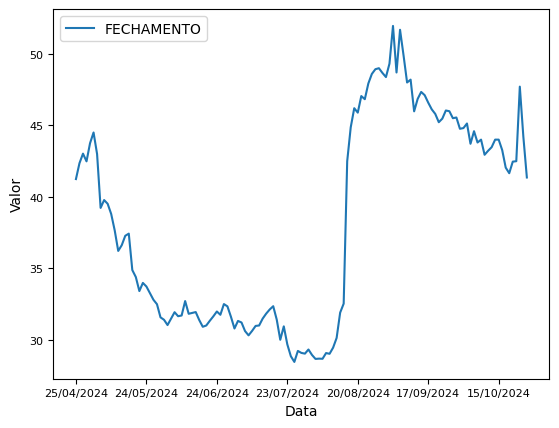

In [33]:
ax = df.plot(y='FECHAMENTO', xlabel='Data', ylabel='Valor', fontsize=8)
ax.get_figure().show()

### Normalização

In [34]:
df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']] = df[['ABERTURA', 'FECHAMENTO', 'MÍNIMO', 'MÁXIMO']].div(100.0)
df['VOLUME'] = df['VOLUME'].div(1000.0)
df['VARIAÇÃO'] = df['VARIAÇÃO'].add(100.0).div(1000.0)
df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,SELIC
25/04/2024,0.4080,0.4124,0.10118,0.4030,0.4140,0.04464,0.040168
26/04/2024,0.4153,0.4235,0.10269,0.4125,0.4276,0.05496,0.040168
29/04/2024,0.4215,0.4302,0.10158,0.4153,0.4327,0.03972,0.040168
30/04/2024,0.4298,0.4248,0.09874,0.4229,0.4378,0.06525,0.040168
02/05/2024,0.4337,0.4375,0.10299,0.4319,0.4478,0.09085,0.040168
...,...,...,...,...,...,...,...
21/10/2024,0.4186,0.4246,0.10194,0.4161,0.4256,0.02814,0.040168
22/10/2024,0.4245,0.4249,0.10007,0.4159,0.4253,0.02537,0.040168
23/10/2024,0.4280,0.4771,0.11229,0.4268,0.4815,0.15365,0.040168
24/10/2024,0.4791,0.4422,0.09268,0.4422,0.4845,0.12676,0.040168


### Separação input e target

In [35]:
# input = [(df[i:i+7].values, np.array([df.iat[i+7, 0]])) for i in range(0, df.index.size - 7)]
input = np.array([(df[i:i+7].to_numpy().flatten()) for i in range(0, df.index.size - 7)])
target = np.array([[df.iat[i+7, 0]] for i in range(0, df.index.size - 7)])

n_test = 7

x_train = input[:-n_test]
t_train = target[:-n_test]

x_test = input[-n_test:]
t_test = target[-n_test:]

x_train.shape, t_train.shape, x_test.shape, t_test.shape

((115, 49), (115, 1), (7, 49), (7, 1))

### Teste

Error: 0.0006033946998866295 - epochs: 60000


C:\Users\rafae\AppData\Local\Temp\ipykernel_17532\1793081846.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  df_test.plot(y=['ABERTURA', 'PREVISTO'], xlabel='Data', ylabel='Valor de fechamento', fontsize=8).get_figure().show()
C:\Users\rafae\AppData\Local\Temp\ipykernel_17532\1793081846.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  df_predict.plot(y=['ABERTURA', 'PREVISTO'], xlabel='Data', ylabel='Valor de fechamento', fontsize=8).get_figure().show()


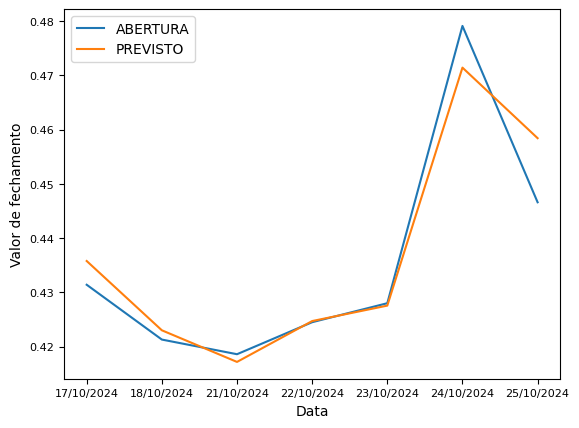

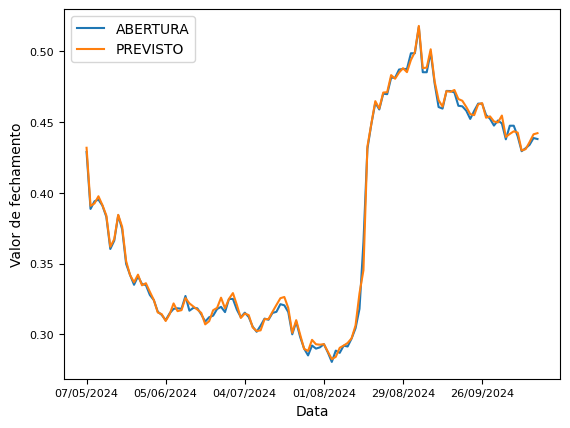

In [36]:
from mlp_model import MLP

mlp = MLP(layers_sizes=[49, 200, 175, 150, 125, 75, 50, 25, 5, 1])
error, epochs = mlp.train(x_train, t_train, learning_rate=0.0025, max_epochs=60000, tolerated_error=0.0001)
print(f'Error: {error} - epochs: {epochs}')

y_test = mlp.predict(x_test)
df_test = df.iloc[-n_test:].copy()
df_test['PREVISTO'] = y_test

df_test.plot(y=['ABERTURA', 'PREVISTO'], xlabel='Data', ylabel='Valor de fechamento', fontsize=8).get_figure().show()

y = mlp.predict(x_train)

df_predict = df.iloc[7:-n_test].copy()
df_predict['PREVISTO'] = y

df_predict.plot(y=['ABERTURA', 'PREVISTO'], xlabel='Data', ylabel='Valor de fechamento', fontsize=8).get_figure().show()